# Parameter estimation

This notebook shows how to use the Dottermodel to estimate the friction parameter in a stream. 

First, we import the dotter model

In [14]:
%matplotlib inline
from dotter import dotter
from dotter import notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [15]:
stream = dotter.build_model_from_config('../cases/example_03/config.ini')
measurements = np.loadtxt('../cases/example_03/measurements.csv', skiprows=1, delimiter=',')

Initialising geometry...
Loading lateral sources...
Generating computational grid...
Planting vegetation...
Loading events...
Model loaded


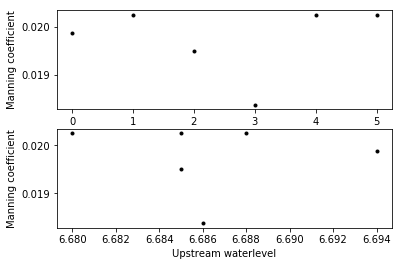

KeyboardInterrupt: 

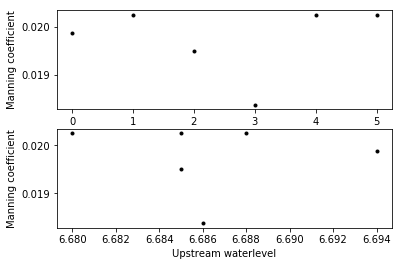

In [22]:
Q = measurements.T[0]
h_up = measurements.T[1]
h_down = measurements.T[2]
t = list(range(len(Q)))

fig, axes = plt.subplots(2)
axes[0].set_ylabel('Manning coefficient')
axes[0].set_xlabel('Days')
axes[1].set_xlabel('Upstream waterlevel')
axes[1].set_ylabel('Manning coefficient')
frictionvalues = []

for q, hup, hdown, it in notebook.log_progress(zip(Q, h_down, h_up, t), every=1):
    stream.parameters['h'] = hdown - 5.13
    stream.parameters['Q'] = q
    stream.generate_grid()
    friction, res = dotter.estimate_roughness(stream, hup, 'waterlevel')
    frictionvalues.append(friction[0])
    axes[0].plot(it, friction, '.k')
    axes[1].plot(hup, friction, '.k')
    display.clear_output(wait=True)
    display.display(fig)

np.savetxt('frictionvalues.csv', frictionvalues, delimiter=',')

